# Linear Regression From First Principles

## In this notebook we will derive the supervised learning algorith of linear regression from scratch using its mathematical principles

In [28]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Import and read the data

In [29]:
# import the data
data = pd.read_csv('Salary_Data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


### This dataset compares salary to the years of experience

In [30]:
# set up the data
X = data['YearsExperience'].values
y = data['Salary'].values

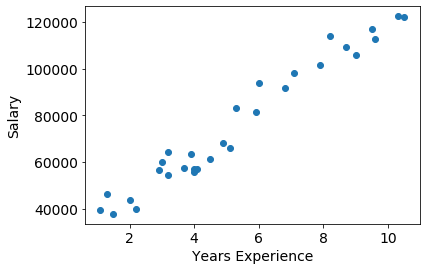

In [31]:
# plot the data
plt.scatter(X,y)
plt.xlabel('Years Experience', fontsize = 14)
plt.ylabel('Salary', fontsize = 14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

### Normalise the data using Z = (x - mu)/sigma to improve performance

In [32]:
# normalise the data
for i in range(len(X)):
    X[i] = (X[i] - np.mean(X)) / np.std(X)
    y[i] = (y[i] - np.mean(y)) / np.std(y)

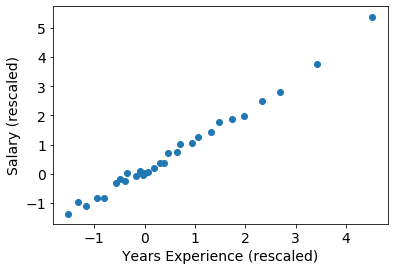

In [33]:
# replot the data
plt.scatter(X,y)
plt.xlabel('Years Experience (rescaled)', fontsize = 14)
plt.ylabel('Salary (rescaled)', fontsize = 14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

### Prep the data for matrix multiplications 

In [34]:
# assign dummy features
y = np.reshape(y, (30,1))
X = np.reshape(X,newshape=(-1,1))
X = np.hstack((np.ones((X.shape[0],1)), X))

### Build the model 

In [35]:
def linreg(x, y, alpha, epochs):
    
    # intialise the theta values
    m = len(y)
    theta = np.zeros((X.shape[1],1))
    cost = []
    
    for i in range(epochs):
        
        # predicted output
        h = np.dot(x,theta)
        
        # cost function
        J = (1/(2*m)) * np.sum(np.square(h-y))
        
        # update the parameters
        d_theta = (1/m) * np.dot(x.T, h-y)
        theta = theta - alpha*d_theta
        
        cost.append(J)
        
    return theta, cost
    


### Apply the model and plot the cost function 

In [36]:
# set parameters for the iteration
alpha = 0.1
epochs = 21

In [37]:
# apply the model
theta, cost = linreg(X, y, alpha, epochs)

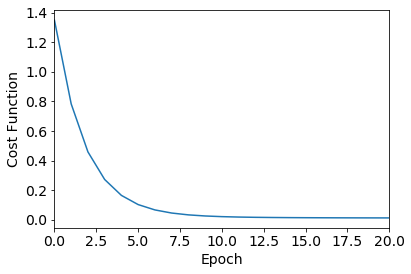

In [38]:
# write the epochs to a list
epoch_list = [i for i in range(epochs)]

plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Cost Function', fontsize=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlim(0,20,1)
plt.plot(epoch_list, cost)
plt.show()

### Plot the linear regression line 

In [39]:
# unpack the X values
one, a = zip(*X)

In [40]:
# create the line, y = mx + c
y_pred = a*theta[1] + theta[0]

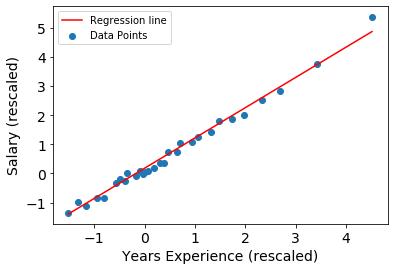

In [43]:
# plotting the regression line
plt.scatter(a,y, label='Data Points')
plt.plot(a,y_pred, color = 'r', label = 'Regression line')
plt.xlabel('Years Experience (rescaled)', fontsize = 14)
plt.ylabel('Salary (rescaled)', fontsize = 14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend()
plt.show()

### We can see that our line fits the data very well 

## Model from sklearn

In [74]:
# import packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [70]:
# set up the data again
X = data[['YearsExperience']].values
y = data['Salary'].values

# split into test train 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 7)

# train the model
model = LinearRegression()  
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
# Print out the line values y = mx + c
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

Intercept:  0.155417965345038
Coefficient:  [1.0057085]


In [72]:
# use the test data to predict values to test the model
pred = model.predict(x_test)

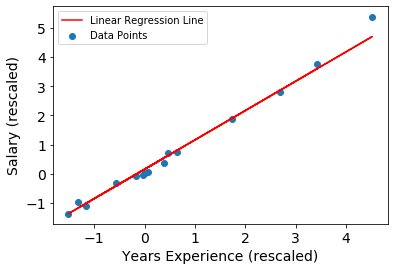

In [73]:
# plotting the regression line
plt.scatter(x_test,y_test, label='Data Points')
plt.plot(x_test, pred, 'Red', label = 'Linear Regression Line')
plt.xlabel('Years Experience (rescaled)', fontsize = 14)
plt.ylabel('Salary (rescaled)', fontsize = 14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend()
plt.show()

## The regression line is the same!